# Installation of Packages

First install packages like numpy, scikit-learn, matplotlib

In [1]:
!pip install numpy scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


## Importation of packages

We import the necessary packages

In [2]:
import numpy as np
from sklearn import svm
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Dataset

We load the necessary IRIS dataset. 

In [3]:
cancer = datasets.load_breast_cancer()

## Description of the Dataset

### Input features

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Target feature

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

## Verify number of records

In [6]:
print(f"Number of Input Records: {len(cancer.data)}")
print(f"Number of Target Records: {len(cancer.target)}")

Number of Input Records: 569
Number of Target Records: 569


## Visulizing the dataset

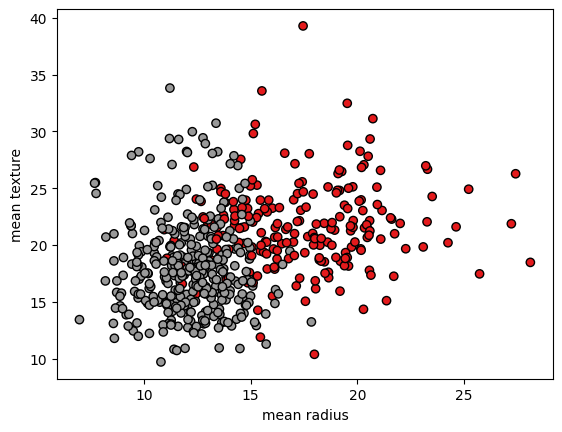

In [7]:
x = cancer.data
y = cancer.target

plot.scatter(x[:, 0], x[:, 1], c=y, cmap=plot.cm.Set1, edgecolor="k")
plot.xlabel(cancer.feature_names[0])
plot.ylabel(cancer.feature_names[1])
plot.show()

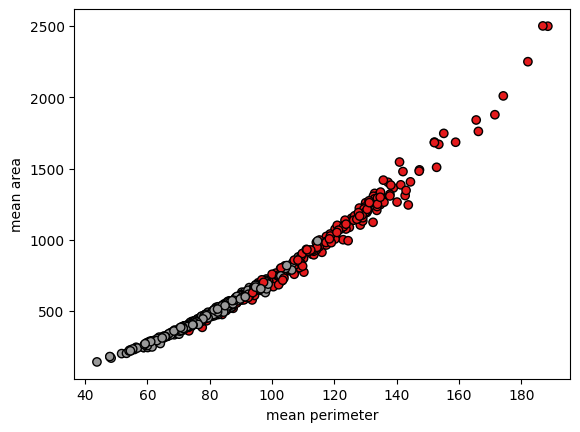

In [8]:
plot.scatter(x[:, 2], x[:, 3], c=y, cmap=plot.cm.Set1, edgecolor="k")
plot.xlabel(cancer.feature_names[2])
plot.ylabel(cancer.feature_names[3])
plot.show()

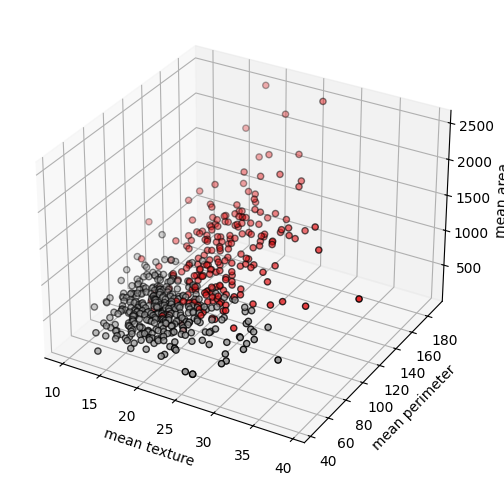

In [9]:
fig = plot.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

ax.scatter(x[:, 1], x[:, 2], x[:, 3], c=y, cmap=plot.cm.Set1, edgecolor="k")
ax.set_xlabel(cancer.feature_names[1])
ax.set_ylabel(cancer.feature_names[2])
ax.set_zlabel(cancer.feature_names[3])
plot.show()

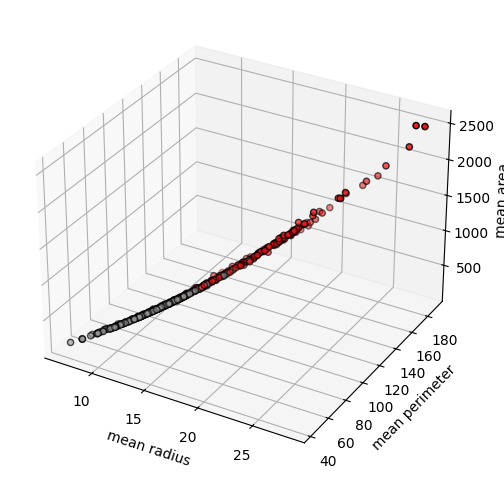

In [10]:
fig = plot.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

ax.scatter(x[:, 0], x[:, 2], x[:, 3], c=y, cmap=plot.cm.Set1, edgecolor="k")
ax.set_xlabel(cancer.feature_names[0])
ax.set_ylabel(cancer.feature_names[2])
ax.set_zlabel(cancer.feature_names[3])
plot.show()

## Training

In [11]:
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, random_state=12, stratify=y
)

In [12]:
print(f"Number of Training Records (input): {len(x_train)}")
print(f"Number of Training Records (target): {len(y_train)}")

print(f"Number of Test Records (input): {len(x_test)}")
print(f"Number of Test Records (input): {len(x_test)}")

Number of Training Records (input): 398
Number of Training Records (target): 398
Number of Test Records (input): 171
Number of Test Records (input): 171


## Standardization of features 

In [13]:
sc = StandardScaler()
sc.fit(x_train)
print(f"Mean: {sc.mean_} \nVariance={sc.var_}")

Mean: [1.41116357e+01 1.93185176e+01 9.19045980e+01 6.52341960e+02
 9.66789196e-02 1.05407538e-01 8.93099095e-02 4.90316307e-02
 1.81254271e-01 6.30428141e-02 4.05524874e-01 1.23957437e+00
 2.88369472e+00 4.00465050e+01 6.94425879e-03 2.58227136e-02
 3.20159445e-02 1.17238518e-02 2.03908492e-02 3.83992337e-03
 1.62950075e+01 2.58059548e+01 1.07512337e+02 8.83543467e+02
 1.32253090e-01 2.59834422e-01 2.75337379e-01 1.14728872e-01
 2.90603769e-01 8.47426382e-02] 
Variance=[1.21148968e+01 1.93139543e+01 5.81708590e+02 1.19210235e+05
 2.02861211e-04 2.94862617e-03 6.59054875e-03 1.54361157e-03
 7.37663889e-04 4.76459835e-05 7.02566544e-02 3.48667141e-01
 3.79566539e+00 1.83372480e+03 9.32635828e-06 3.50145290e-04
 9.40691912e-04 4.01944541e-05 6.53382860e-05 7.41031383e-06
 2.36127072e+01 3.98101703e+01 1.15402630e+03 3.30127345e+05
 5.23850716e-04 2.76004641e-02 4.53267425e-02 4.53968643e-03
 3.70242936e-03 3.34704998e-04]


In [14]:
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [15]:
classifier = svm.SVC()

# training
classifier.fit(x_train_std, y_train)

SVC()

## Classification report

In [16]:
predicted_target = classifier.predict(x_test_std)

# classification report
print(metrics.classification_report(y_test, predicted_target))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## Confusion matrix

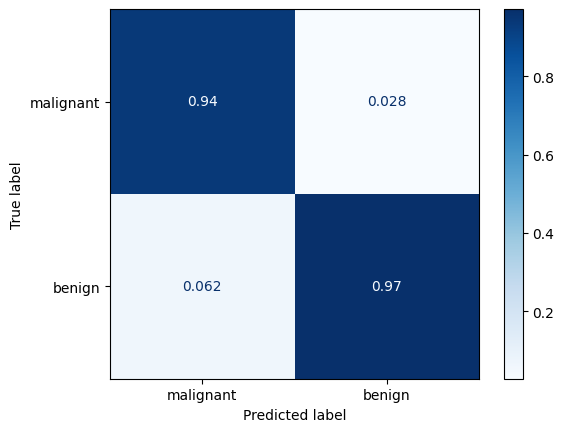

In [17]:
cm = confusion_matrix(y_test, predicted_target, normalize="pred")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap=plot.cm.Blues)

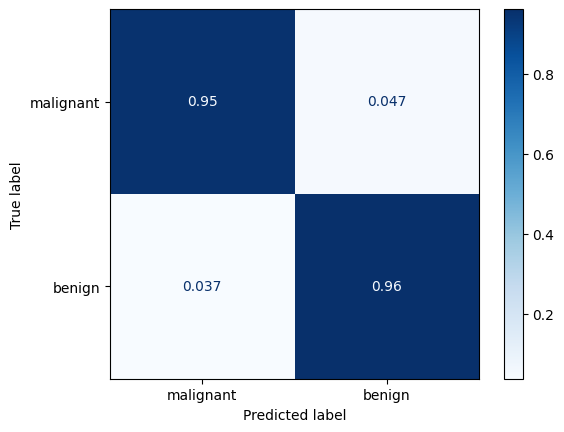

In [18]:
cm = confusion_matrix(y_test, predicted_target, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap=plot.cm.Blues)

## References

- [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
- [3D scatterplot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Iris classification with sklearn perceptron](https://www.kaggle.com/code/choihanbin/iris-classification-with-sklearn-perceptron)
- [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)
- [plot_confusion_matrix without estimator](https://stackoverflow.com/questions/60776749/plot-confusion-matrix-without-estimator)